# Analyzing Data from Multiple Files

## Learning Objectives {.objectives}

*   Use a library function to get a list of filenames that match a simple wildcard pattern.
*   Use a for loop to process multiple files.

We now have almost everything we need to process all our data files.
The only thing that's missing is a library with a rather unpleasant name:

In [1]:
import glob

The `glob` library contains a single function, also called `glob`,
that finds files whose names match a pattern.
We provide those patterns as strings:
the character `*` matches zero or more characters,
while `?` matches any one character.
We can use this to get the names of all the html files:

In [2]:
glob.glob('*.html')

[]

As these examples show,
`glob.glob`'s result is a list of strings,
which means we can loop over it
to do something with each filename in turn.
In our case,
the "something" we want to do is generate a set of plots for each file in our inflammation dataset.
Let's test it by analyzing the first three files in the list:

In [9]:
import numpy
filenames = sorted(glob.glob('data/small*.csv'))
print(filenames)

['data\\small-01.csv', 'data\\small-02.csv', 'data\\small-03.csv']


data\small-01.csv


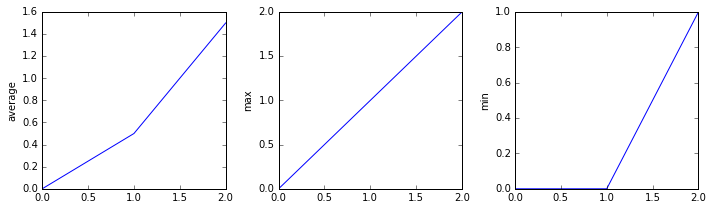

data\small-02.csv


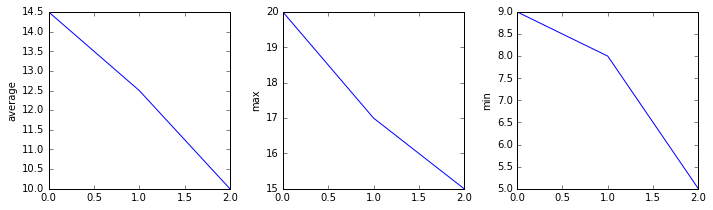

data\small-03.csv


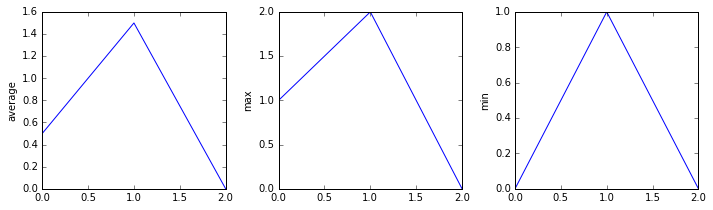

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

filenames = filenames[0:3]
for f in filenames:
    print(f)

    data = numpy.loadtxt(fname=f, delimiter=',')

    fig = plt.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(data.mean(axis=0))

    axes2.set_ylabel('max')
    axes2.plot(data.max(axis=0))

    axes3.set_ylabel('min')
    axes3.plot(data.min(axis=0))

    fig.tight_layout()
    plt.show(fig)

Sure enough,
the maxima of the first two data sets show exactly the same ramp as the first,
and their minima show the same staircase structure;
a different situation has been revealed in the third dataset,
where the maxima are a bit less regular, but the minima are consistently zero.